# **1 - Perkenalan**

---



Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama : Andik Al Fauzi

Objective : Membuat model machine learning untuk membuat prediksi penjualan

#**2 - Background**

Penjualan adalah terjadinya penyaluran suatu barang/jasa dari produsen ke konsumen, baik secara tunai maupun kredit. Dengan adanya penjualan suatu barang/jasa maka diharapkan terjadinya perputaran ekonomi yang baik. Dari sisi produsen mengharapkan terjadinya volume penjualan yang tinggi sehingga akan didapatkan keuntungan yang maksimal. **ParagonCorp** adalah salah satu produsen dari beberapa brand kosmetik di Indonesia. Volume penjualan merupakan ujung tombak dari **ParagonCorp**, hal ini didasari karena salah satu poin penting dalam mencetak laba adalah dengan adanya volume penjualan yang tinggi. Dengan alasan ini maka saya selaku bagian di Data Analyst akan membuat insight dan membuat model prediksi penjualan dari dataset yang sudah ada.

# **3 - Import Libraries**

---



Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import calendar

# Model Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Model Preprocessing libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, classification_report, accuracy_score
from math import sqrt

# Importing Libraries
import pickle
import json
import datetime as dt

# Warning Library
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Installing other library
!pip install pyramid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.0/115.0 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 17.2 MB/s eta 0:00:00


# **4 - Data Loading**

---



Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [3]:
# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/andik-alfauzi/Final-Project/main/sample_dataset_timeseries_noarea.csv')

# Display
data.head(10)

,week_number,week_start_date,week_end_date,product_item,quantity
0,2021-52,2021-12-27,2022-01-02,0073377087c7ddace313ff829cd7b0b3,41
1,2021-52,2021-12-27,2022-01-02,012d2bb142b2d5e57330acbfd8e9ac52,430
2,2021-52,2021-12-27,2022-01-02,0192926e33d1153b63511a5b83eca843,4
3,2021-52,2021-12-27,2022-01-02,019502f6d13e383caa9b9673bf1302f8,148
4,2021-52,2021-12-27,2022-01-02,01e7ca6d4e21badc1d4225b6b2c7bd9e,119
5,2021-52,2021-12-27,2022-01-02,01fa9977e1c61ce5542c6f0c2a1b2895,2
6,2021-52,2021-12-27,2022-01-02,043e6d02d98b44c40645c8a22812fe88,44
7,2021-52,2021-12-27,2022-01-02,0512efdcc99fa4d57c42cd2cf6c73633,165
8,2021-52,2021-12-27,2022-01-02,05262da388ab82c51c48c9535bc8b121,41
9,2021-52,2021-12-27,2022-01-02,058cc2cecb91d10e901a597e67532619,383


# **5 - Exploratory Data Analysis (EDA)**

---

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.



In [4]:
# Describing data
data.describe()

,quantity
count,102733.000000
mean,3191.562419
std,12074.631014
min,0.000000
25%,75.000000
50%,414.000000
75%,1890.000000
max,774732.000000


In [5]:
# Info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102733 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   week_number      102733 non-null  object
 1   week_start_date  102733 non-null  object
 2   week_end_date    102733 non-null  object
 3   product_item     102731 non-null  object
 4   quantity         102733 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 3.9+ MB


Hampir semua data bertipe object, hanya 1 yang bertipe numerik yaitu quantity

In [6]:
# Convert dataset
data['week_start_date'] = pd.to_datetime(data['week_start_date'], format='%Y-%m-%d')
data['week_end_date'] = pd.to_datetime(data['week_end_date'], format='%Y-%m-%d')

# Check after converting
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102733 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   week_number      102733 non-null  object        
 1   week_start_date  102733 non-null  datetime64[ns]
 2   week_end_date    102733 non-null  datetime64[ns]
 3   product_item     102731 non-null  object        
 4   quantity         102733 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.9+ MB


In [7]:
# Check invertal of data
data['freq'] = ((data['week_end_date'] - data['week_start_date']).dt.days)+1

# Display
print('Interval date range : ', data.freq.unique())

Interval date range :  [7]


Semua data memiliki range yang sama yaitu penjualan mingguan

In [8]:
# Check missing value
data.loc[(data['quantity'] == 0)]

,week_number,week_start_date,week_end_date,product_item,quantity,freq
72589,2022-47,2022-11-21,2022-11-27,6adc4ddabd44c5aa2f4c6105ceda926a,0,7
74199,2022-48,2022-11-28,2022-12-04,6adc4ddabd44c5aa2f4c6105ceda926a,0,7
75806,2022-49,2022-12-05,2022-12-11,6adc4ddabd44c5aa2f4c6105ceda926a,0,7


Ada 1 item yang tidak memiliki performa penjualan

In [9]:
# Check duplicated
data.duplicated().sum()

0

No data duplicated

In [10]:
# Check missing value
print('Data missing in dataset : ')
print('')
print(data.isnull().sum())

Data missing in dataset : 

week_number        0
week_start_date    0
week_end_date      0
product_item       2
quantity           0
freq               0
dtype: int64


Terdapat data missing sebanyak 2 dikolom `product_item`, karena data yang missing hanya 2 dari 102.733 maka data missing tersebut akan didrop.

In [11]:
# Drop missing data
data = data.dropna()

In [12]:
# Check after drop
print('Data missing in dataset : ')
print('')
print(data.isnull().sum())

Data missing in dataset : 

week_number        0
week_start_date    0
week_end_date      0
product_item       0
quantity           0
freq               0
dtype: int64


Missing value berhasil didrop

In [13]:
# Check sales per item
salesPerItem = data.groupby('product_item', as_index=False)['quantity'].sum()

# Creating dataframe
salesPerItem = pd.DataFrame(salesPerItem)

# Display
salesPerItem

,product_item,quantity
0,00450b4fde94b528b4255b4f6f51599d,15691
1,0065e8b533cd2c8273529312a6e8f219,29334
2,0073377087c7ddace313ff829cd7b0b3,9645
3,0098d23d332c193a07eabaf0f703d4e5,214632
4,009e12e8fd2ef0b77047206e939fc6b9,39402
...,...,...
2304,ff92741956851dca5a1daafeef1d9dd7,16
2305,ff9d05a4d6f922b3ab1653f58165b8ce,16
2306,ffbd6f1d884056a4f622d54ae79e5a14,3532900
2307,ffdf02b13a7c56d736d6a5ca701d936b,218


In [14]:
# Describing sales per item
salesPerItem.describe()

,quantity
count,2.309000e+03
mean,1.420002e+05
std,5.951554e+05
min,2.000000e+00
25%,8.960000e+02
50%,1.040600e+04
75%,7.377700e+04
max,1.820638e+07


Penjualan maksimal per item ada di angka 18 jutaan product yang terjual dan terendah ada di angka 2 product

In [16]:
# Check the product_item sales frequency
data.product_item.value_counts()

0073377087c7ddace313ff829cd7b0b3    67
870b3ad8c41b746b29ba31f6e4040950    67
9264576b8833b892b34a39525bcdd271    67
921cfbd1930eeee6b82a7b053c4ed8dc    67
91f65f29b32c39788b4294cbe2be7024    67
                                    ..
d97d3a3e53124b6b1a8313403f54f6b8     1
d963020bd8d76659c6768ad252be9629     1
d4e90f2dcbcf53757d6bd1f3b6f368cb     1
170ad92bf82a3509886ceb841cd6e3c3     1
ff9d05a4d6f922b3ab1653f58165b8ce     1
Name: product_item, Length: 2309, dtype: int64

Dapat dilihat pada data tersebut, dimana `product_item` terbanyak ada di angka 67 dan terendah ada di angka 1.

Berdasarkan data diatas, SKU (Stok Keeping Unit) adalah suatu kode yang diidentifikasikan terhadap suatu barang untuk menandai suatu barang yang dijual ataupun dibeli. Atau dapat dikatakan SKU adalah suatu kode unik dari seorang wirausahawan untuk menandai suatu barang yang akan dijual.

Manfaat dari pemberian SKU ini adalah :
1. Mempermudah control stok barang
2. Mempercepat proses transaksi
3. Mempermudah pencarian terhadap suatu barang
4. Analisis bisnis terkait suatu produk
5. Perencanaan suplai terhadap suatu produk

In [25]:
# Check low sales of product_item
under5Sales = salesPerItem.loc[(salesPerItem.quantity) <= 5]
under5Sales

,product_item,quantity
31,032115532ec9ddd8db33270b89c2b3b4,3
53,04f23ce3472359127503baafdcd26566,4
65,05c5f7ef2c62812ad43171bd0c68e5a8,4
81,06fd73444a38e1d15daf3f6e6daf518c,2
109,0a34b8158913801066a50897e0aeeede,3
...,...,...
2219,f702a4c4a8e81c980e2b6af3768cef6f,4
2223,f73327a6adb4669763189b8761d13a4e,4
2225,f782021abbbc96df1994396320f1d7fd,4
2270,fc44bfd0a54abcf7bd6442fd6706aaab,4


Dari data diatas, dapat dilihat ada 98 `product_item` yang memiliki volume penjualan sampai dengan 5 barang. Hal ini perlu diperhatikan dan ditingkatkan lagi promosi terhadap barang tersebut agar penjualannya bisa semakin meningkat. Atau jika memang respon pasar tidak terlalu baik terhadap barang diatas, maka mungkin dari pihak management bisa memutuskan untuk discontinue terhadap barang tersebut.

In [26]:
# Check the lowest sales
lowSales = data.loc[(data['quantity'] <= 5)]
lowSales

,week_number,week_start_date,week_end_date,product_item,quantity,freq
2,2021-52,2021-12-27,2022-01-02,0192926e33d1153b63511a5b83eca843,4,7
5,2021-52,2021-12-27,2022-01-02,01fa9977e1c61ce5542c6f0c2a1b2895,2,7
18,2021-52,2021-12-27,2022-01-02,09526918c3845ef9d13fbde9f90f608a,3,7
19,2021-52,2021-12-27,2022-01-02,09ba614cfa8b54cecbfb8cae73e5ce61,2,7
22,2021-52,2021-12-27,2022-01-02,0e1e5658dae97cd8dedf084b1c0753a1,3,7
...,...,...,...,...,...,...
102601,2023-14,2023-04-03,2023-04-09,ea19d8d861f541d67b7f5cabf230c92a,4,7
102637,2023-14,2023-04-03,2023-04-09,ef3b8ecd6b7ad7f30508da89a07db067,2,7
102676,2023-14,2023-04-03,2023-04-09,f68d9bdc3915db2e900a78f6d4be6285,2,7
102683,2023-14,2023-04-03,2023-04-09,f7c2b5ff6ba252b780780252ae357cfe,4,7


In [27]:
# Grouping lowest sales
lowSales = lowSales.groupby('week_start_date')['quantity'].sum()
lowSales = pd.DataFrame(lowSales)
lowSales

,quantity
week_start_date,
2021-12-27,178
2022-01-03,271
2022-01-10,152
2022-01-17,280
2022-01-24,143
...,...
2023-03-06,235
2023-03-13,237
2023-03-20,260


<Figure size 1800x1000 with 0 Axes>

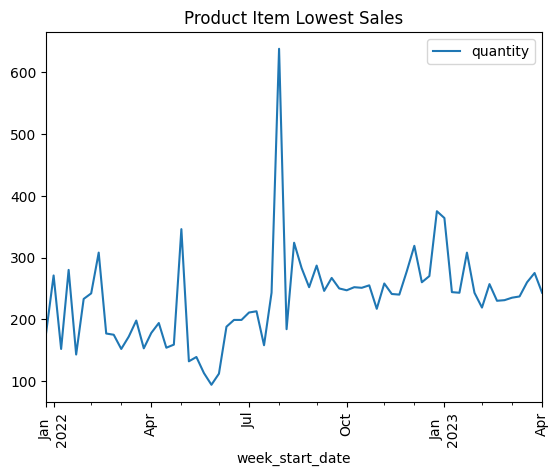

In [28]:
# Visualize low sales
plt.figure(figsize=(18, 10))
lowSales.plot()
plt.xticks(rotation=90)
plt.title('Product Item Lowest Sales')
plt.show()

Dapat dilihat pada grafik untuk penjualan pada May - June 2022 mengalami penjualan yang sangat rendah, dimana total penjualan product_item dibawah 5 barang hanya dibawah 100. Hal ini mungkin diakibatkan karena adanya Libur Idul Fitri 1434 Hijriah dan adanya proses Pendaftaran siswa baru/Kenaikan kelas, sehingga para pelanggan tidak memiliki budget untuk membeli product-product dari **ParagonCorp**. Sedangkan dari total penjualan pada bulan September 2022 memiliki performa yang cukup baik dimana total penjualan dapat mencapai 610 barang. Hal ini mungkin adanya promosi yang gencar terhadap product yang memiliki performa penjualan dibawah 5 barang tersebut.

In [35]:
# Prepare Data
sales = data.groupby('week_start_date')['quantity'].sum().reset_index()

# Display
sales.head(10)

,week_start_date,quantity
0,2021-12-27,128808
1,2022-01-03,3839557
2,2022-01-10,4138934
3,2022-01-17,4149077
4,2022-01-24,4824273
5,2022-01-31,4008027
6,2022-02-07,4311010
7,2022-02-14,3882636
8,2022-02-21,4256541
9,2022-02-28,3883810


Ini merupakan dataset yang akan  digunakan untuk membuat model prediksi. Data di kolom `week_start_date` dan `quantity` adalah data yang akan digunakan nantinya.

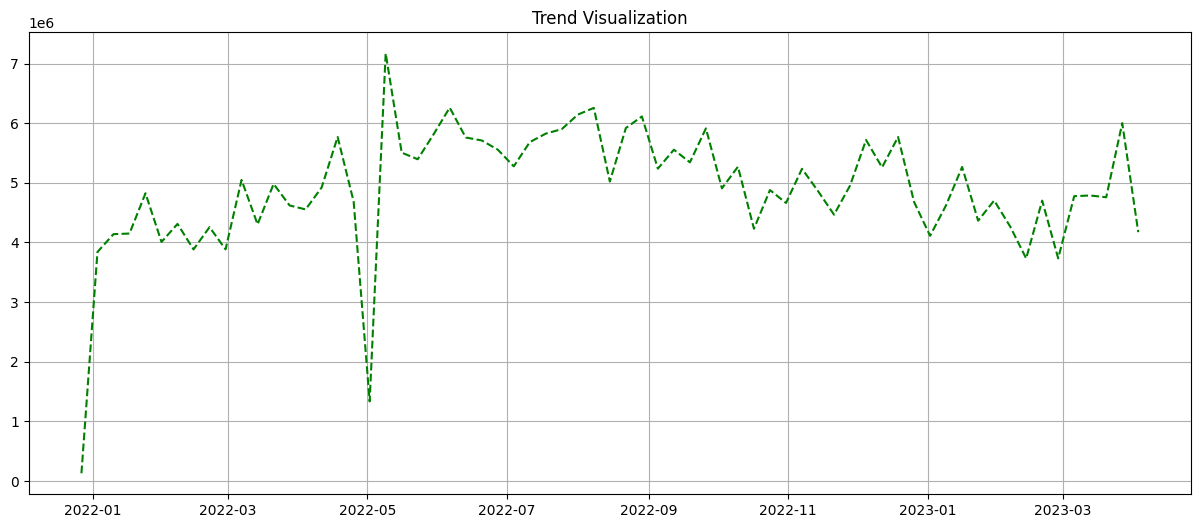

In [40]:
# Visualize the sales data
plt.figure(figsize=(15,6))
plt.plot(sales['week_start_date'], sales['quantity'], linestyle='dashed', color='Green')
plt.title('Trend Visualization')
plt.grid(True)
plt.show()

Dari trend visualisasi diatas menunjukan performa penjualan mengalami fluktuatif. Khususnya pada bulan May 2022 yang merupakan total penjualan terendah dengan total penjualan hanya berkisar 1,5 juta product. Dapat dilihat pada bulan tersebut memang bertepatan dengan adanya cuti bersama dan libur Idul Fitri 1434 Hijriah dan juga persiapan penerimaan siswa baru dan kenaikan kelas sehingga daya beli konsumen terhadap produk kosmetik sedikit mengalami penurunan. 

In [39]:
# Change index to time series
timeFlowSales = sales.set_index('week_start_date')
timeFlowSales.index

DatetimeIndex(['2021-12-27', '2022-01-03', '2022-01-10', '2022-01-17',
               '2022-01-24', '2022-01-31', '2022-02-07', '2022-02-14',
               '2022-02-21', '2022-02-28', '2022-03-07', '2022-03-14',
               '2022-03-21', '2022-03-28', '2022-04-04', '2022-04-11',
               '2022-04-18', '2022-04-25', '2022-05-02', '2022-05-09',
               '2022-05-16', '2022-05-23', '2022-05-30', '2022-06-06',
               '2022-06-13', '2022-06-20', '2022-06-27', '2022-07-04',
               '2022-07-11', '2022-07-18', '2022-07-25', '2022-08-01',
               '2022-08-08', '2022-08-15', '2022-08-22', '2022-08-29',
               '2022-09-05', '2022-09-12', '2022-09-19', '2022-09-26',
               '2022-10-03', '2022-10-10', '2022-10-17', '2022-10-24',
               '2022-10-31', '2022-11-07', '2022-11-14', '2022-11-21',
               '2022-11-28', '2022-12-05', '2022-12-12', '2022-12-19',
               '2022-12-26', '2023-01-02', '2023-01-09', '2023-01-16',
      

Reset index menjadi time-series ini digunakan untuk mempermudah tracking dan analysis data.

In [42]:
# Add column year, month and day
timeFlowSales['year'] = pd.DatetimeIndex(timeFlowSales.index).year
timeFlowSales['month'] = pd.DatetimeIndex(timeFlowSales.index).month
timeFlowSales['day'] = pd.DatetimeIndex(timeFlowSales.index).day_name()

# Display
timeFlowSales

,quantity,year,month,day
week_start_date,,,,
2021-12-27,128808,2021,12,Monday
2022-01-03,3839557,2022,1,Monday
2022-01-10,4138934,2022,1,Monday
2022-01-17,4149077,2022,1,Monday
2022-01-24,4824273,2022,1,Monday
...,...,...,...,...
2023-03-06,4775638,2023,3,Monday
2023-03-13,4787111,2023,3,Monday
2023-03-20,4757590,2023,3,Monday


Dapat dilihat pada data diatas, data `week_start_date` selalu diambil pada hari Senin dan setiap bulan ada 4-5 kali tergantung dari bulannya.

## 5.1 Statistika Deskriptif

In [43]:
# Describe data
timeFlowSales.describe()

,quantity,year,month
count,6.700000e+01,67.000000,67.000000
mean,4.893709e+06,2022.194030,5.626866
std,1.044440e+06,0.434804,3.663232
min,1.288080e+05,2021.000000,1.000000
25%,4.337716e+06,2022.000000,2.000000
50%,4.907074e+06,2022.000000,5.000000
75%,5.619344e+06,2022.000000,9.000000
max,7.172144e+06,2023.000000,12.000000


Dari deskripsi diatas, penjualan terendah ada diangka 128808 produk sedangkan tertinggi ada diangka 7172144 produk yaitu pada bulan May-2022 pada pekan awal. Sedangkan rata-rata penjualan per-pekan berada di angka 4893709 produk dengan penjualan ditahun 2021-2023

In [45]:
# Check max sales
maxSales = timeFlowSales.loc[timeFlowSales['quantity'].idxmax()]
maxSales

quantity    7172144
year           2022
month             5
day          Monday
Name: 2022-05-09 00:00:00, dtype: object

Penjualan tertinggi terjadi pada tanggal 09 May 2022 sebanyak 7172144 barang. Hal ini terjadi mengingat telah selesainya cuti bersama Idul Fitri 1434 Hijriah yang jatuh pada tanggal 02 - 06 May 2022 sehingga performa penjualan kembali meningkat.

## 5.2 Check Seasonality

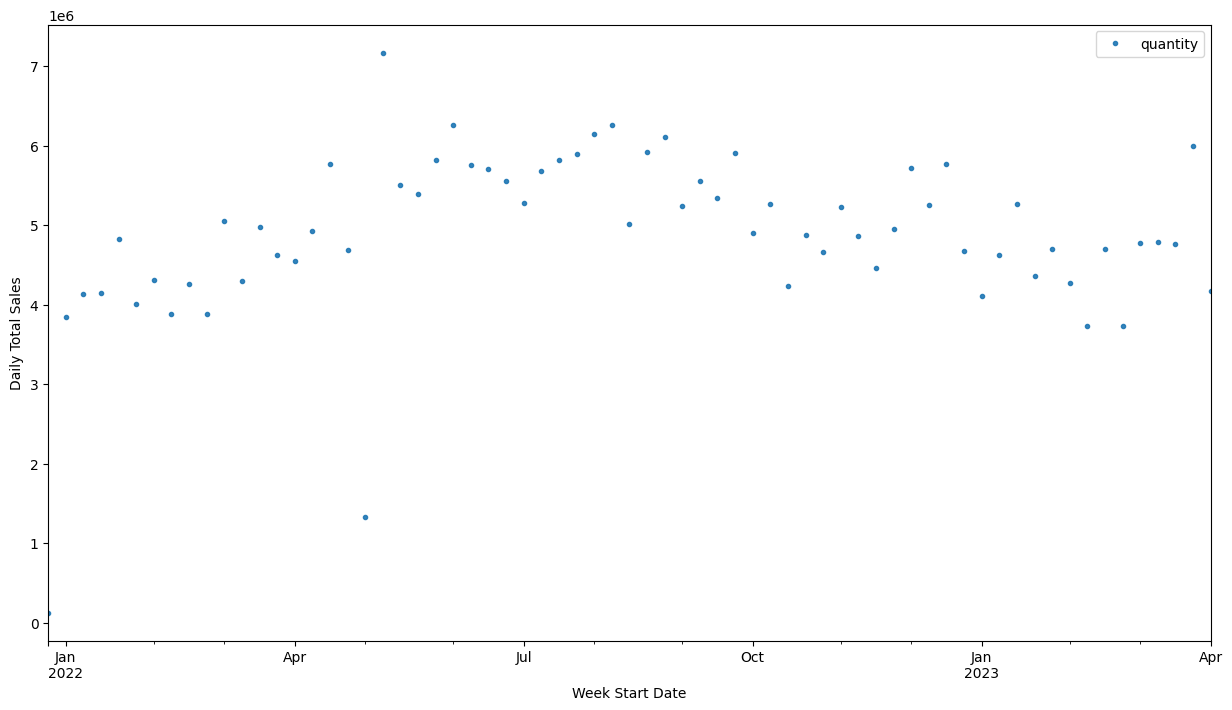

In [48]:
# Check seasonality
colsPlot = ['quantity']
axes = timeFlowSales[colsPlot].plot(marker = '.', alpha=0.9, 
                                    linestyle='None', figsize=(15, 8), subplots=True)
for ax in axes:
  ax.set_ylabel('Daily Total Sales')
  ax.set_xlabel('Week Start Date')

Tujuan dari mengecek seasonality pada data penjualan produk adalah untuk memahami pola-pola tertentu yang terjadi selama periode penjualan dalam satu tahun atau lebih

Dengan mengecek seasonality akan bisa mendapatkan insight apakah suatu produk memiliki pola penjualan tertentu serta mengidentifikasikan faktor-faktor apa saja yang dapat mempengaruhinya, seperti musim liburan, kenaikan kelas, perubahan musim atau acara khusus lainnya. Sehingga dapat membantu Direksi untuk dapat mengambil keputusan mengenai strategi bisnis dan pemasaran yang efektif yang nantinya akan memberikan dampak positif terhadap performa volume penjualan.

Dengan memahami pola-pola penjualan yang sudah terjadi sebelumnya, maka akan bisa membantu dalam membuat model prediksi yang efisien dan lebih akurat.

Untuk mempermudah analisa maka akan dilakukan analisa lanjutan terhadap trend penjualan baik per-pekan, per-bulan dan per-tahun dengan memvisualisasikannya.

### 5.3.1 Yearly - Resampling

In [50]:
# Showing all data
timeFlowSales.loc['2021' :]

,quantity,year,month,day
week_start_date,,,,
2021-12-27,128808,2021,12,Monday
2022-01-03,3839557,2022,1,Monday
2022-01-10,4138934,2022,1,Monday
2022-01-17,4149077,2022,1,Monday
2022-01-24,4824273,2022,1,Monday
...,...,...,...,...
2023-03-06,4775638,2023,3,Monday
2023-03-13,4787111,2023,3,Monday
2023-03-20,4757590,2023,3,Monday


<Axes: xlabel='week_start_date'>

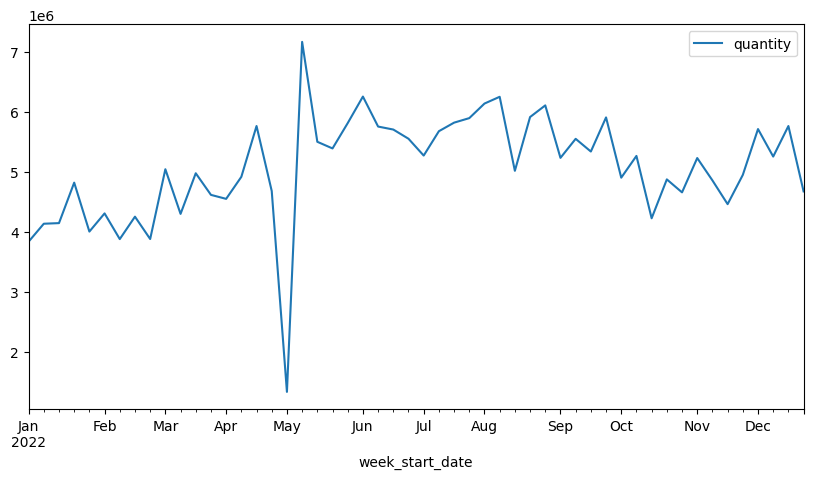

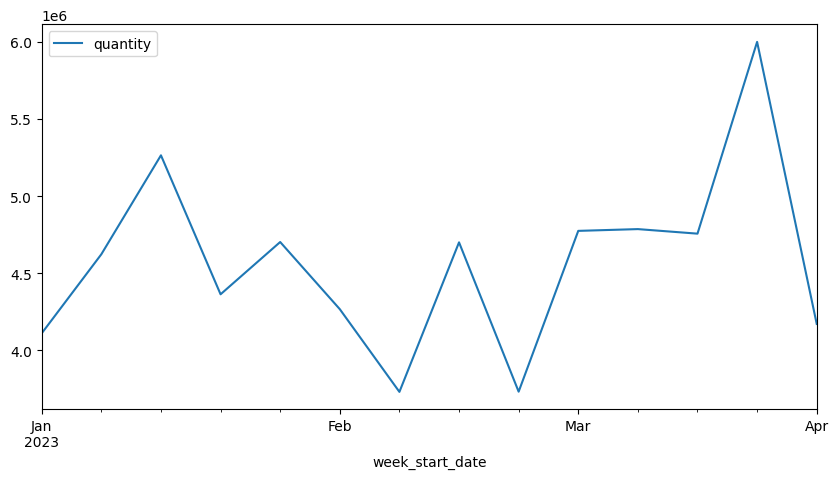

In [53]:
# Visualize by year
colsPlot = ['quantity']
timeFlowSales.loc['2022'][colsPlot].plot(figsize=(10, 5))
timeFlowSales.loc['2023'][colsPlot].plot(figsize=(10, 5))

Dari visualisasi diatas dapat disimpulkan : 
1. Data 2021 tidak digunakan karena hanya terdapat 1 bulan
2. Tanggal 02 May 2022 terjadi penurunan penjualan menjadi `1334134` dari sebelumnya pada tanggal 25 April 2022 sebanyak `4684319`. Hal ini terjadi kemungkinan karena adanya libur bersama Idul Fitri 1443 Hijriah.
3. Awal tahun terjadi tren kenaikan penjualan dikarenakan adanya libur Natal dan Tahun Baru, dan kemungkinan adanya bonus tahunan bagi sebagian karyawan yang berimbas pada kenaikan volume penjualan pada awal tahun

###5.3.2 Weekly - Resampling

In [60]:
# Weekly sales
weekSales = ['quantity']

# Resample weekly sales, aggregating with mean
weekFlowSales = timeFlowSales[weekSales].resample('W').sum()
weekFlowSales

,quantity
week_start_date,
2022-01-02,128808
2022-01-09,3839557
2022-01-16,4138934
2022-01-23,4149077
2022-01-30,4824273
...,...
2023-03-12,4775638
2023-03-19,4787111
2023-03-26,4757590


<Axes: xlabel='week_start_date'>

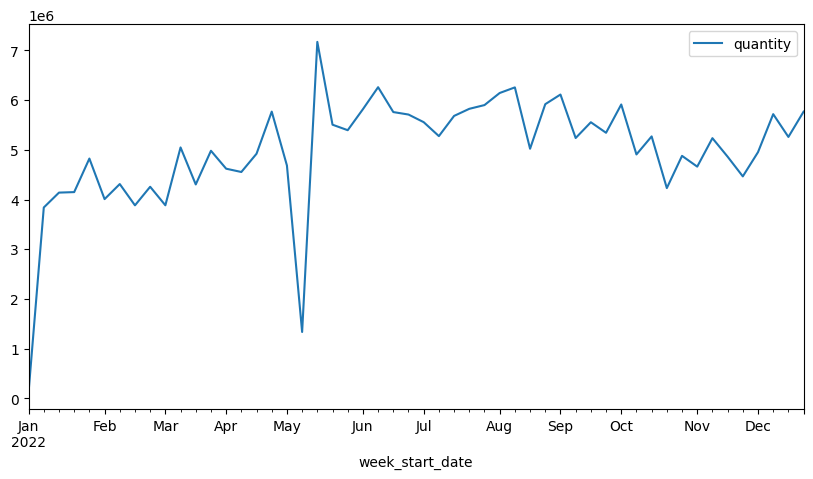

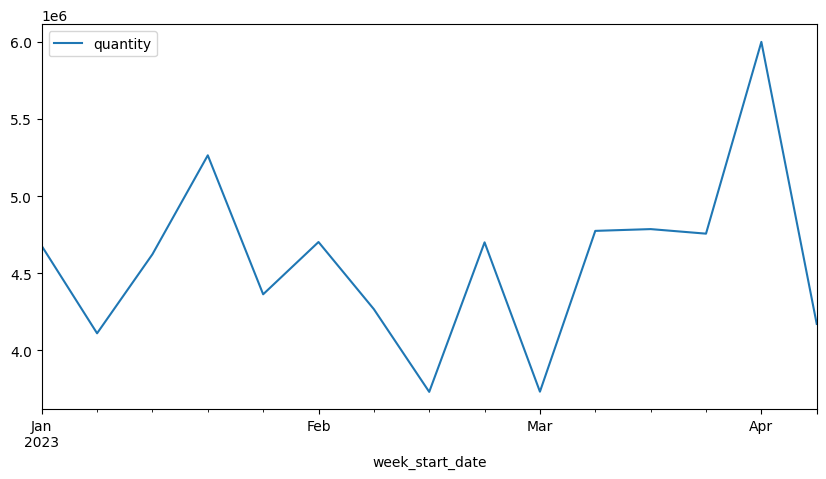

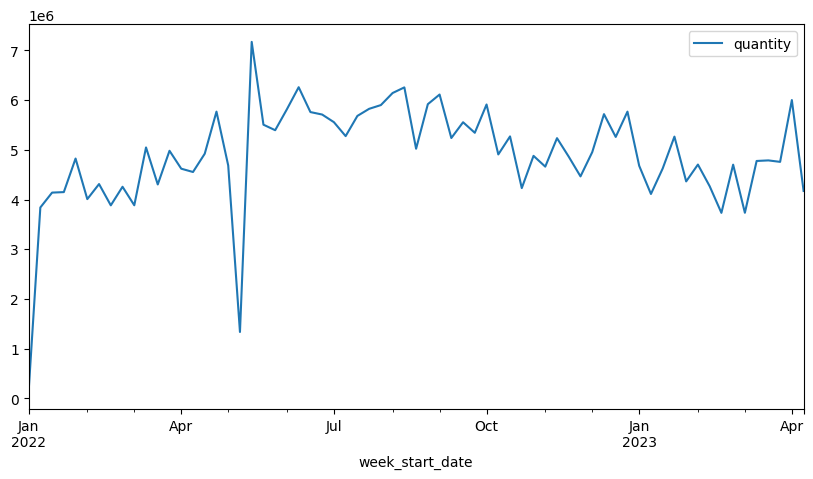

In [63]:
# Visualize weekly sales
weekFlowSales.loc['2022'][colsPlot].plot(figsize=(10, 5))
weekFlowSales.loc['2023'][colsPlot].plot(figsize=(10, 5))
weekFlowSales[colsPlot].plot(figsize=(10, 5))

Dari visualisasi diatas dapat disimpulkan:
1. Tren penjualan mingguan hampir sama dengan trend penjualan tahunan, terjadi kenaikan dan penurunan pada tiap minggunya.
2. Kenaikan terjadi dimana terdapat tanggal yang sama pada bulan berjalan, semisal 1-1, 2-2, 3-3 dan sebagainya pada setiap e-commerce yang memberikan diskon atau bebas ongkos kirim, sehingga semakin menarik minat pembeli untuk melakukan transaksi
3. Dapat dilihat juga, rata-rata kenaikan penjualan terjadi pada pekan ketiga dan keempat dimana sebagian besar karyawan sudah menerima gaji/upah sehingga mereka akan melakukan transaksi, baik via offline maupun e-commerce

### 5.3.3 Monthly - Resampling

In [66]:
# Monthly resampling
monthSales = ['quantity']

# Resampling to monthly frequency, aggregating with mean
monthFlowSales = timeFlowSales[monthSales].resample('M').sum()
monthFlowSales

,quantity
week_start_date,
2021-12-31,128808
2022-01-31,20959868
2022-02-28,16333997
2022-03-31,18952067
2022-04-30,19928123
2022-05-31,25223913
2022-06-30,23286196
2022-07-31,22683481
2022-08-31,29452508


<Axes: xlabel='week_start_date'>

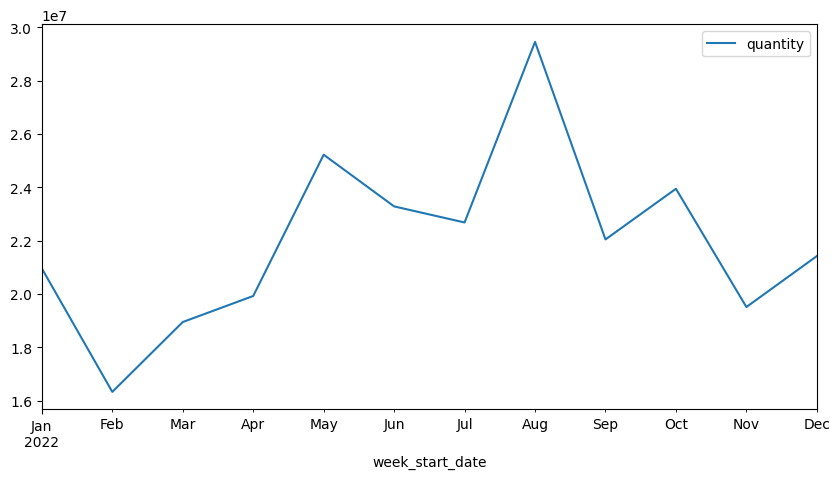

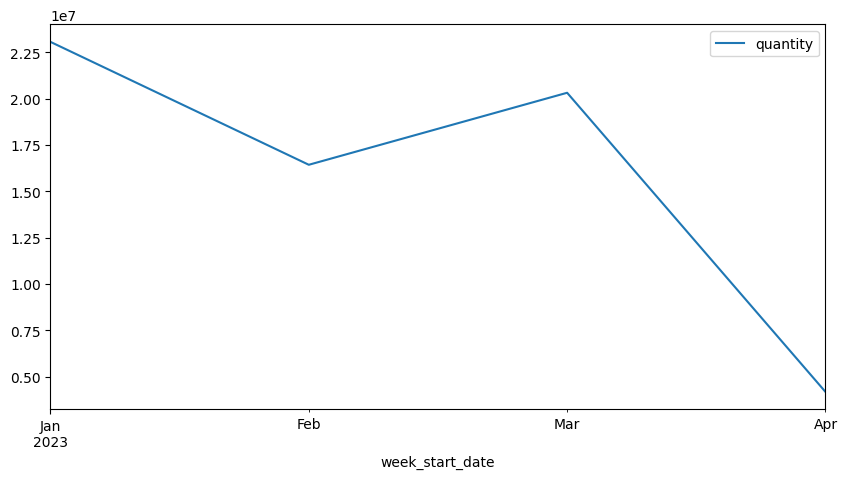

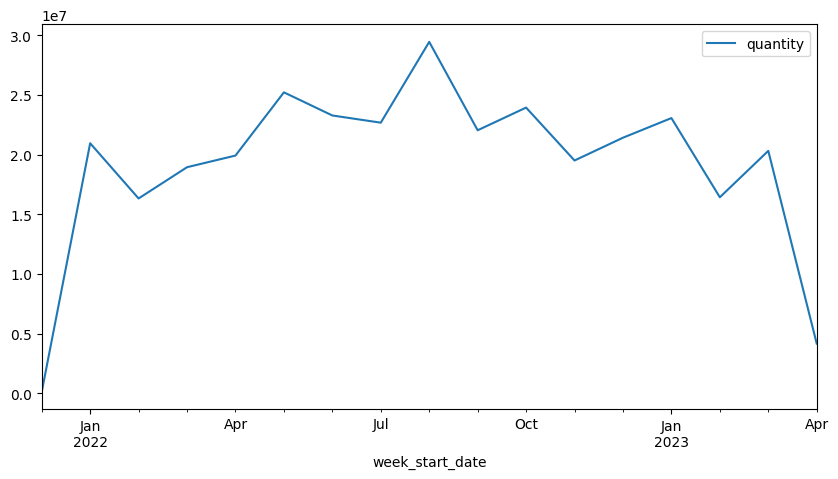

In [67]:
# Visualize monthly resampling
monthFlowSales.loc['2022'][colsPlot].plot(figsize=(10, 5))
monthFlowSales.loc['2023'][colsPlot].plot(figsize=(10, 5))
monthFlowSales[colsPlot].plot(figsize=(10, 5))

Dari visualisasi diatas dapat disimpulkan:
1. Trend penjualan hampir sama dengan tahunan, fluktuatif setiap bulannya.
2. Penjualan terendah pada bulan February 2022 sebanyak 16333997 terjadi mungkin sebagian dana dari konsumen sudah digunakan untuk libur akhir tahun
3. Sementara penjualan tertinggi terjadi di bulan August 2022 dengan total 29452508. Hal ini mungkin bertepatan dengan hari kemerdakaan Indonesia dan banyaknya promo dari e-commerce dan brand ambassador product.

### 5.3.4 Trend Checking

In [71]:
# Function trend checking
def trendCheck(X_df):
  coefficients, residuals, _, _, _ = np.polyfit(range(len(X_df)), X_df, 1, full=True)

  mse = residuals[0]/(len(X_df))
  nrmse = np.sqrt(mse)/(X_df.max() - X_df.min())

  print('Slope  : ' + str(coefficients[0]))
  print('NRMSE  : ' + str(nrmse))

  plt.xticks(rotation=90)
  plt.plot(X_df, marker='.', linestyle='-', linewidth=0.5,
           color='blue', label='Original')
    
  plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(X_df))],
           marker='o', markersize=8, linestyle='-', linewidth=0.5,
           color='orange', label='Regression line');
  plt.legend()
  plt.show()

Slope  : 319495.9370629371
NRMSE  : 0.2313391001411843


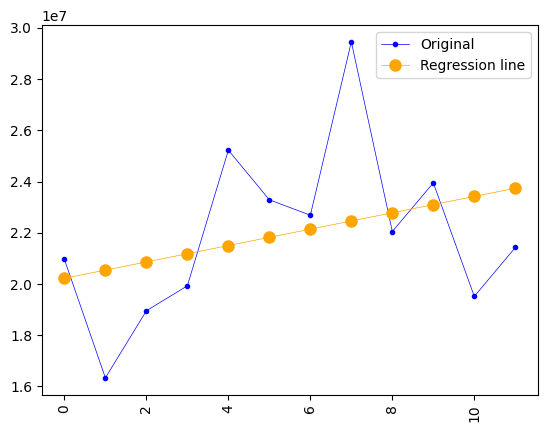

Slope  : -5280253.399999998
NRMSE  : 0.22030897573787028


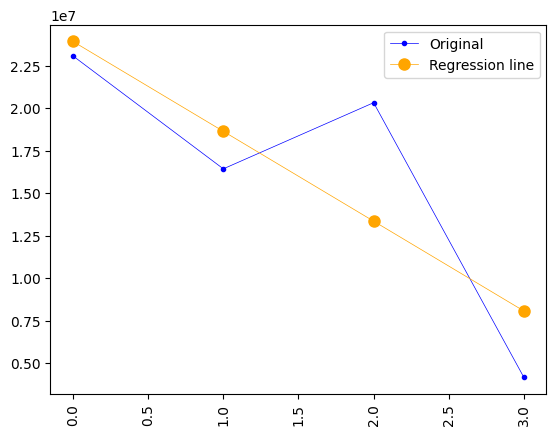

Slope  : [94610.0245098]
NRMSE  : 0.2379210923168305


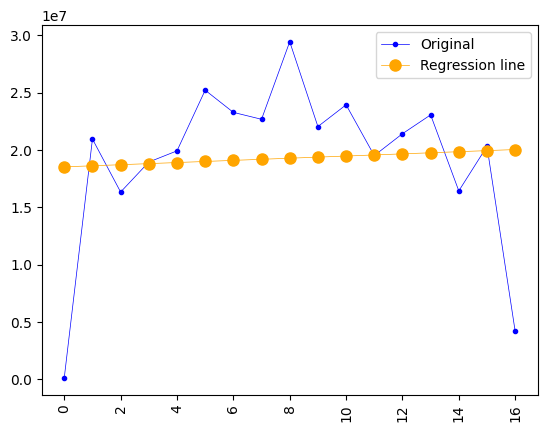

In [73]:
# Trend check
trendCheck(monthFlowSales.loc['2022']['quantity'].values)
trendCheck(monthFlowSales.loc['2023']['quantity'].values)
trendCheck(monthFlowSales[colsPlot].values)

# **6. Data Preprocessing**

---

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

# **7 - Model Definition**

---

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

# 8 - Model Training

---



Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

# **9 - Model Evaluation**

---

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

# **10 - Model Inference**

---

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

# **11 - Model Saving**

---


# **12 - Pengambilan Kesimpulan**

---


Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.